# Final project - House price prediction

## Load packages and data

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
#from sklearn.preprocessing import Imputer 

#-------------pre-processing-------------#
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

#-------------pre-processing-------------#
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#-------------Machine learning model-------------#
from sklearn.linear_model import LinearRegression

#-------------Model evaluation metrics-------------#
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#-------------Plotting-------------#
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Load data

In [2]:
# loading data
train = pd.read_csv(r'C:\Users\Anitha Karunakaran\Documents\GSU_MSDA\Fall1 semester\Data Programming MSA 8010\Final project\train.csv', low_memory=False, delimiter =",")
test_data = pd.read_csv(r'C:\Users\Anitha Karunakaran\Documents\GSU_MSDA\Fall1 semester\Data Programming MSA 8010\Final project\test.csv', low_memory=False, delimiter =",")
dataDict = open(r'C:\Users\Anitha Karunakaran\Documents\GSU_MSDA\Fall1 semester\Data Programming MSA 8010\Final project\data_dictionary.txt')

## Exploratory Data Analysis

+ Describing features and checking the predictive target "Saleprice"
+ Identifying skewness in data using histogram
+ Finding correlation between features and with the target variable
+ Scatterplot on features against target variable "Saleprice" shows the trend 

In [3]:
#dimentionality of data
print(train.shape)
print(test_data.shape)
print(dataDict.read())

(1460, 81)
(1459, 80)
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low D

# WORKING ON TRAIN DATA

In [4]:
# Print summary statistics
train_description = train.describe()
print(train_description)

print("\n")

# Print DataFrame information
train_info = train.info()
print(train_info)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0804E7550>,
      dtype=object)

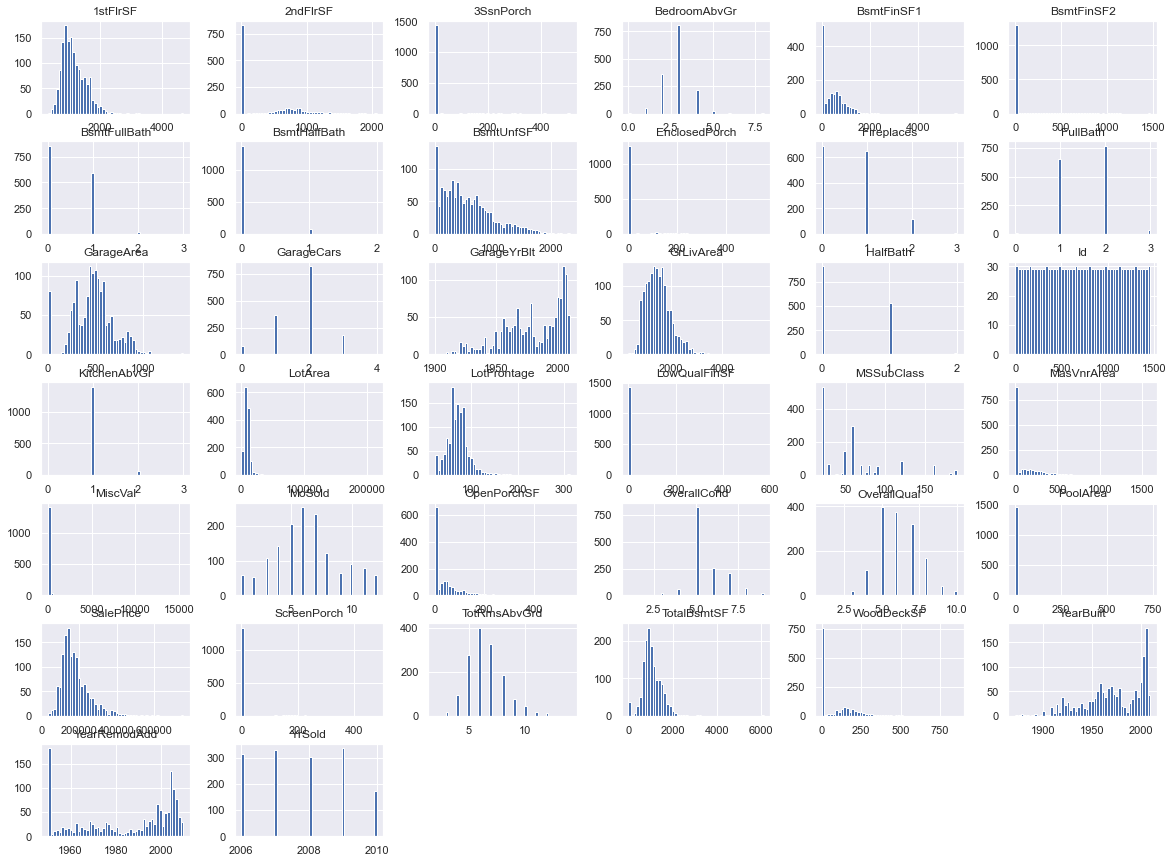

In [187]:
#plot histogram for numerical attributes
train.hist(bins=50, figsize=(20,15))

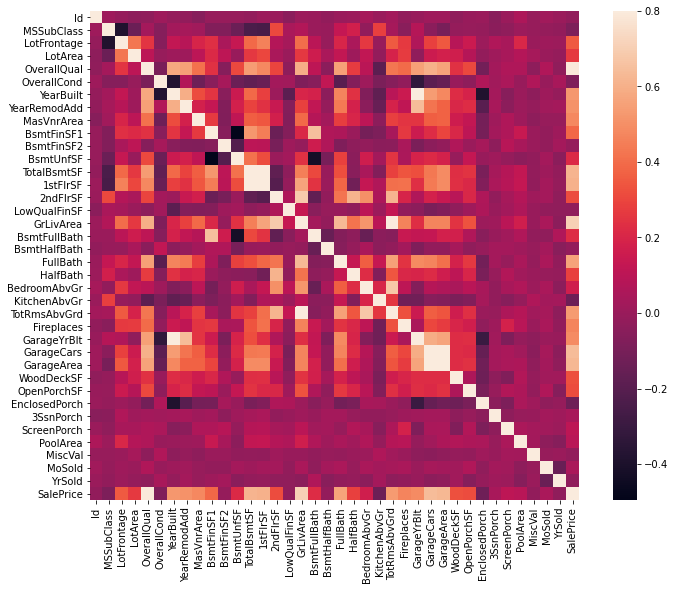

In [12]:
#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

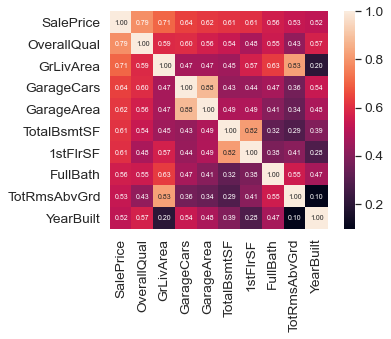

In [13]:
#top 10 features having high correlation with Saleprice

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

These are the variables most correlated with 'SalePrice':

+ 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
+ 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers.Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
+ 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right.
+ 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
+ 'YearBuilt'.It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 

Let's proceed to the scatter plots.

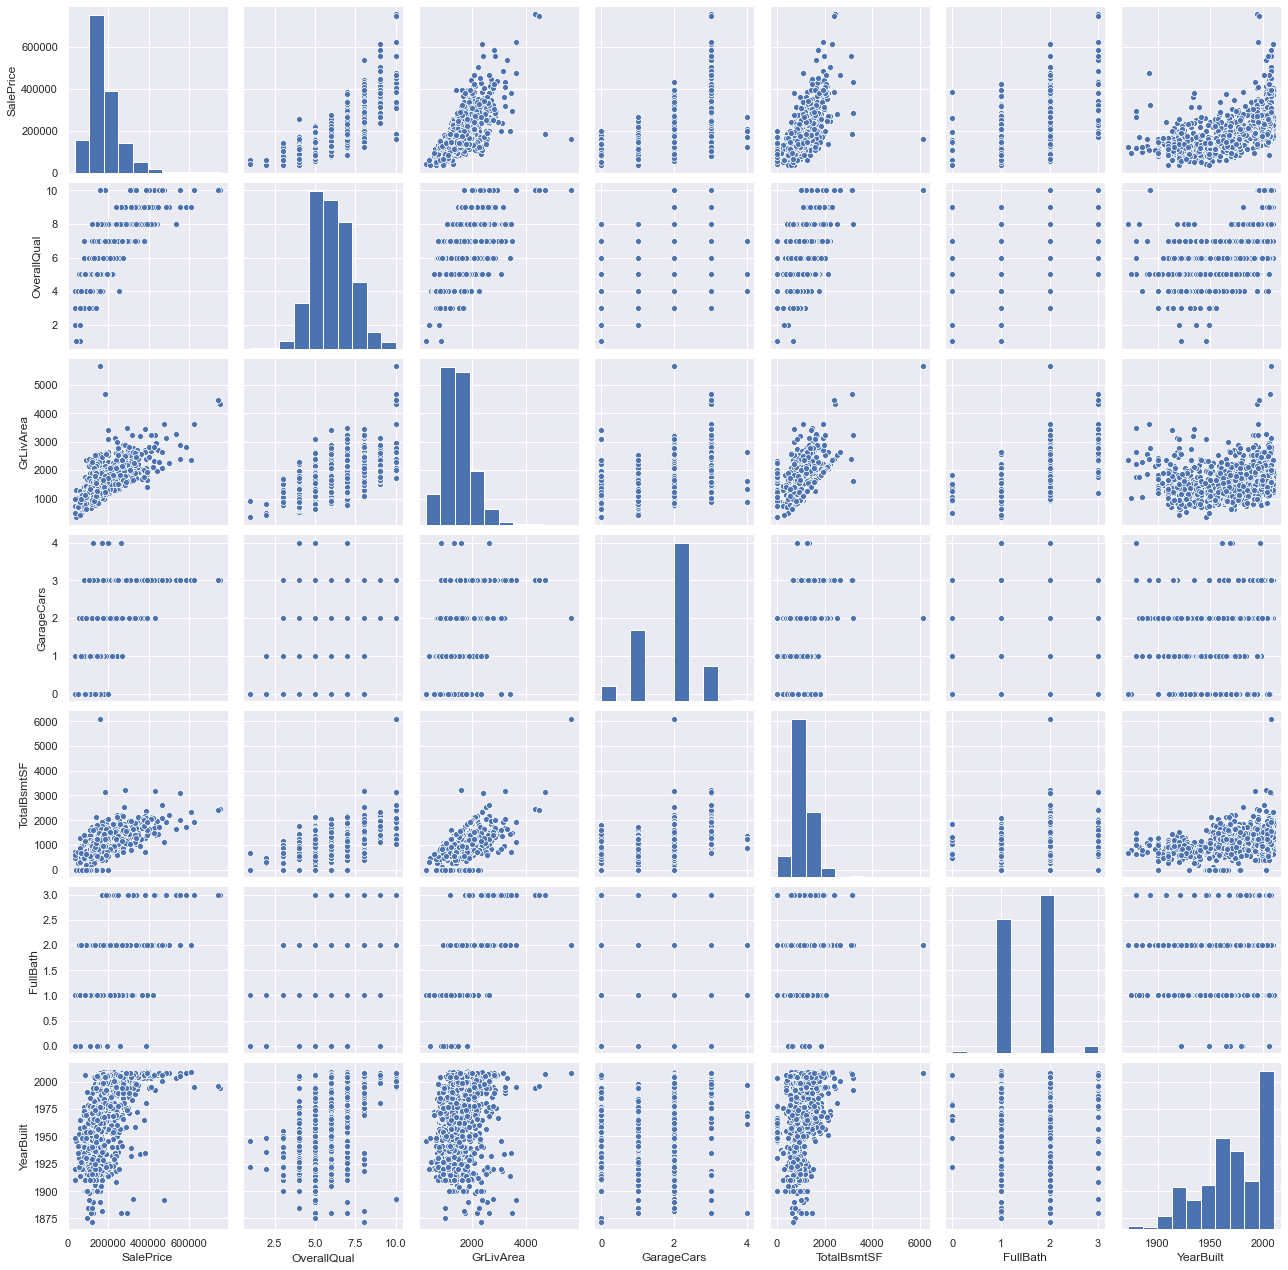

In [190]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Data Pre-Processing

+ Identifying missing data
+ Categorical data encoding
+ Missing data imputation
+ Log transformation on "Saleprice" column to remove skewness

### Missing data

Important questions when thinking about missing data:

+ How prevalent is the missing data?
+ Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [ ]:
### On train data

In [5]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#missing_data.index

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook#3.-Keep-calm-and-work-smart

Let's analyse this to understand how to handle the missing data.

+ We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. 
+ According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete.
+ Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.
+ In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, we'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.
+ Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.
+ Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [6]:
# Remove these columns with higher missing data
print(train.shape)

#or train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'])

print(train.shape)

(1460, 81)
(1460, 63)


In [7]:
#dealing with missing data on "Electrical" feature

train = train.drop(train.loc[train['Electrical'].isnull()].index)
print(train.isnull().sum().max()) #just checking that there's no missing data missing...
print(train.shape)

0
(1459, 63)


### Categorical data encoding

In [8]:
train.head(1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500


In [9]:
train['ExterQual'] = train['ExterQual'].map (lambda x: 0 if ('Po' in x) else 1 if ('Fa' in x)
                                             else 2 if ('TA' in x) else 3 if ('Gd' in x) else 4 if ('Ex' in x) else 5 )

train['MSZoning'] = train['MSZoning'].map (lambda x: 0 if ('RL' in x) else 1 if ('C (all)' in x)
                                           else 2 if ('FV' in x) else 3 if ('RH' in x) else 4 if ('RL' in x) else 5 )

train['Street'] = train['Street'].map (lambda x: 0 if ('Pave' in x) else 1 if ('Grvl' in x) else 2 )

train['LotShape'] = train['LotShape'].map (lambda x: 0 if ('Reg' in x) else 1 if ('IR1' in x)
                                           else 2 if ('IR2' in x) else 3 if ('IR3' in x) else 4 )

train['LandContour'] = train['LandContour'].map (lambda x: 0 if ('Bnk' in x) else 1 if ('Lvl' in x)
                                                 else 2 if ('Hls' in x) else 3 if ('Low' in x) else 4 )

train['Utilities'] = train['Utilities'].map (lambda x: 0 if ('AllPub' in x) else 1 if ('NoSeWa' in x) else 2 )

train['LotConfig'] = train['LotConfig'].map (lambda x: 0 if ('Inside' in x) else 1 if ('Corner' in x)
                                             else 2 if ('FR2' in x) else 3 if ('CulDeSac' in x) else 4 if ('FR3' in x) else 5)

train['LandSlope'] = train['LandSlope'].map (lambda x: 0 if ('Gtl' in x) else 1 if ('Mod' in x)
                                             else 2 if ('Sev' in x) else 3 )

train['Electrical'] = train['Electrical'].map (lambda x: 0 if ('SBrkr' in x)
                                                   else 1 if ('FuseA' in x)    else 2 if ('FuseF' in x)    else 3 if ('FuseP' in x)    else 4 if ('Mix' in x)    else 5 if ('NA' in x)    else 6) 

train['Neighborhood'] = train['Neighborhood'].map (lambda x: 0 if ('IDOTRR' in x)
                                                   else 1 if ('CollgCr' in x) else 2 if ('Veenker' in x) else 3 if ('Crawfor' in x) else 4 if ('NoRidge' in x)
                                                   else 5 if ('Mitchel' in x) else 6 if ('Somerst' in x) else 7 if ('NWAmes' in x) else 8 if ('OldTown' in x)
                                                   else 9 if ('BrkSide' in x) else 10 if ('Sawyer' in x) else 11 if ('SawyerW' in x) else 12 if ('NridgHt' in x)
                                                   else 13 if ('NAmes' in x) else 14 if ('MeadowV' in x) else 15 if ('Edwards' in x) else 16 if ('Timber' in x)
                                                   else 17 if ('StoneBr' in x) else 18 if ('ClearCr' in x) else 19 if ('Gilbert' in x) else 20 if ('NPkVill' in x)
                                                   else 21 if ('Blmngtn' in x) else 22 if ('BrDale' in x) else 23 if ('SWISU' in x) else 21 if ('Blmngtn' in x)
                                                   else 22 if ('BrDale' in x) else 23 if ('SWISU' in x) else 24 if ('Blueste' in x) else 24 if ('Blueste' in x) else 25)

train['Condition1'] = train['Condition1'].map (lambda x: 0 if ('Artery' in x)
                                               else 1 if ('Feedr' in x) else 2 if ('Norm' in x) else 3 if ('PosA' in x) else 4 if ('PosN' in x) else 5 if ('RRAe' in x)
                                               else 6 if ('RRAn' in x) else 7 if ('RRNe' in x) else 8 if ('RRNn' in x) else 9)

train['Condition2'] = train['Condition2'].map (lambda x: 0 if ('Artery' in x)
                                               else 1 if ('Feedr' in x) else 2 if ('Norm' in x) else 3 if ('PosA' in x) else 4 if ('PosN' in x)
                                               else 5 if ('RRAe' in x) else 6 if ('RRAn' in x) else 7 if ('RRNn' in x) else 8)

train['BldgType'] = train['BldgType'].map (lambda x: 0 if ('1Fam' in x)
                                           else 1 if ('2fmCon' in x) else 2 if ('Duplex' in x) else 3 if ('Twnhs' in x) else 4 if ('TwnhsE' in x) else 5)

train['HouseStyle'] = train['HouseStyle'].map (lambda x: 0 if ('1.5Fin' in x)
                                               else 1 if ('1.5Unf' in x) else 2 if ('1Story' in x) else 3 if ('2.5Fin' in x) else 4 if ('2.5Unf' in x)
                                               else 5 if ('2Story' in x) else 6 if ('SFoyer' in x) else 7 if ('SLvl' in x) else 8)

train['RoofStyle'] = train['RoofStyle'].map (lambda x: 0 if ('Flat' in x)
                                                 else 1 if ('Gable' in x) else 2 if ('Gambrel' in x)     else 3 if ('Hip' in x)     else 4 if ('Mansard' in x)
                                                 else 5 if ('Shed' in x)     else 6)

train['RoofMatl'] = train['RoofMatl'].map (lambda x: 0 if ('ClyTile' in x)
                                               else 1 if ('CompShg' in x)     else 2 if ('Membran' in x)     else 3 if ('Metal' in x)     else 4 if ('Roll' in x)
                                               else 5 if ('Tar&Grv' in x)    else 6 if ('WdShake' in x)    else 7 if ('WdShngl' in x)    else 8 )

train['Exterior1st'] = train['Exterior1st'].map (lambda x: 0 if ('AbsShng' in x)
                                                 else 1 if ('AsphShn' in x) else 2 if ('BrkComm' in x) else 3 if ('BrkFace' in x) else 4 if ('CBlock' in x)
                                                 else 5 if ('CemntBd' in x) else 6 if ('HdBoard' in x) else 7 if ('ImStucc' in x) else 8 if ('MetalSd' in x)
                                                 else 9 if ('Other' in x) else 10 if ('Plywood' in x) else 11 if ('PreCast' in x) else 12 if ('Stone' in x)
                                                 else 13 if ('Stucco' in x) else 14 if ('VinylSd' in x) else 15 if ('Wd Sdng' in x) else 16 if ('WdShing' in x) else 17)

train['Exterior2nd'] = train['Exterior2nd'].map (lambda x: 0 if ('AbsShng' in x)
                                                 else 1 if ('AsphShn' in x) else 2 if ('BrkComm' in x) else 3 if ('BrkFace' in x) else 4 if ('CBlock' in x)
                                                 else 5 if ('CemntBd' in x) else 6 if ('HdBoard' in x) else 7 if ('ImStucc' in x) else 8 if ('MetalSd' in x)
                                                 else 9 if ('Other' in x) else 10 if ('Plywood' in x) else 11 if ('PreCast' in x) else 12 if ('Stone' in x)
                                                 else 13 if ('Stucco' in x) else 14 if ('VinylSd' in x) else 15 if ('Wd Sdng' in x) else 16 if ('WdShing' in x) else 17)

train['ExterCond'] = train['ExterCond'].map (lambda x: 0 if ('Ex' in x)
                                                 else 1 if ('Gd' in x)     else 2 if ('TA' in x)    else 3 if ('Fa' in x)    else 4 if ('Po' in x)    else 5)

train['Foundation'] = train['Foundation'].map (lambda x: 0 if ('BrkTil' in x)
                                                   else 1 if ('PConc' in x)    else 2 if ('CBlock' in x)    else 3 if ('Slab' in x)    else 4 if ('Stone' in x)
                                                   else 5 if ('Wood' in x)    else 6)

train['Heating'] = train['Heating'].map (lambda x: 0 if ('Floor' in x)
                                             else 1 if ('GasA' in x)    else 2 if ('GasW' in x)    else 3 if ('Grav' in x)    else 4 if ('OthW' in x)
                                             else 5 if ('Wall' in x)    else 6)

train['HeatingQC'] = train['HeatingQC'].map (lambda x: 0 if ('Ex' in x)
                                                 else 1 if ('Gd' in x)    else 2 if ('TA' in x)    else 3 if ('Fa' in x)    else 4 if ('Po' in x)    else 5)

train['CentralAir'] = train['CentralAir'].map (lambda x: 0 if ('N' in x)    else 1 if ('Y' in x)    else 2)
                                            
train['KitchenQual'] = train['KitchenQual'].map (lambda x: 0 if ('Ex' in x)
                                                     else 1 if ('Gd' in x)    else 2 if ('TA' in x)    else 3 if ('Fa' in x)    else 4 if ('Po' in x)    else 5)
                                           
train['Functional'] = train['Functional'].map (lambda x: 0 if ('Typ' in x)
                                                   else 1 if ('Min1' in x)    else 2 if ('Min2' in x)    else 3 if ('Mod' in x)    else 4 if ('Maj1' in x)
                                                   else 5 if ('Maj2' in x)    else 6 if ('Sev' in x)    else 7 if ('Sal' in x)    else 8)
              
train['PavedDrive'] = train['PavedDrive'].map (lambda x: 0 if ('Y' in x)
                                                   else 1 if ('P' in x)    else 2 if ('N' in x)    else 3)
                                                                              
train['SaleType'] = train['SaleType'].map (lambda x: 0 if ('WD' in x)
                                           else 1 if ('CWD' in x) else 2 if ('VWD' in x) else 3 if ('New' in x) else 4 if ('COD' in x) else 5 if ('Con' in x)
                                           else 6 if ('ConLw' in x) else 7 if ('ConLI' in x) else 8 if ('ConLD' in x) else 9 if ('Oth' in x) else 10 )

train['SaleCondition'] = train['SaleCondition'].map (lambda x: 0 if ('Normal' in x)
                                                     else 1 if ('Abnormal' in x) else 2 if ('AdjLand' in x) else 3 if ('Alloca' in x) else 4 if ('Family' in x)
                                                     else 5 if ('Partial' in x) else 6 )


In [10]:
#https://www.datacamp.com/community/tutorials/categorical-data

cat_df_flights = train.select_dtypes(include=['object']).copy()
cat_df_flights.head()

""
0
1
2
3
4


### Missing Data Imputation

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

imputer.fit(train)
X = imputer.transform(train)
train_tr = pd.DataFrame(X, columns = train.columns)

print(train_tr.info())
train_tr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   float64
 1   MSSubClass     1459 non-null   float64
 2   MSZoning       1459 non-null   float64
 3   LotArea        1459 non-null   float64
 4   Street         1459 non-null   float64
 5   LotShape       1459 non-null   float64
 6   LandContour    1459 non-null   float64
 7   Utilities      1459 non-null   float64
 8   LotConfig      1459 non-null   float64
 9   LandSlope      1459 non-null   float64
 10  Neighborhood   1459 non-null   float64
 11  Condition1     1459 non-null   float64
 12  Condition2     1459 non-null   float64
 13  BldgType       1459 non-null   float64
 14  HouseStyle     1459 non-null   float64
 15  OverallQual    1459 non-null   float64
 16  OverallCond    1459 non-null   float64
 17  YearBuilt      1459 non-null   float64
 18  YearRemo

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,0.875942,10517.363948,0.004112,0.408499,1.108979,0.000685,0.577793,0.062371,...,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,0.459219,0.928718,180930.394791
std,421.411181,42.310746,1.803925,9984.666267,0.064018,0.582398,0.662369,0.026180,1.277085,0.276322,...,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,1.241245,2.019552,79468.964025
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.500000,20.000000,0.000000,7549.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,129950.000000
50%,730.000000,50.000000,0.000000,9477.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000
75%,1094.500000,70.000000,0.000000,11603.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000
max,1460.000000,190.000000,5.000000,215245.000000,1.000000,3.000000,4.000000,1.000000,5.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,9.000000,6.000000,755000.000000


### Log transformation to remove skewness

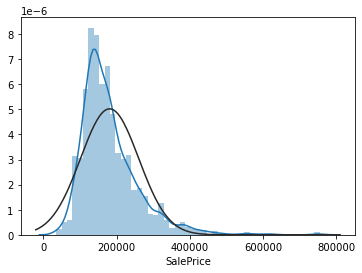

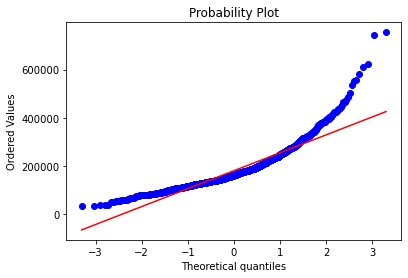

In [12]:
#Pre-log transformation
sns.distplot(train_tr['SalePrice'], fit = stats.norm);
fig = plt.figure()
res = stats.probplot(train_tr['SalePrice'], plot = plt)

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


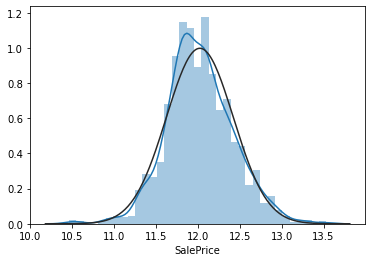

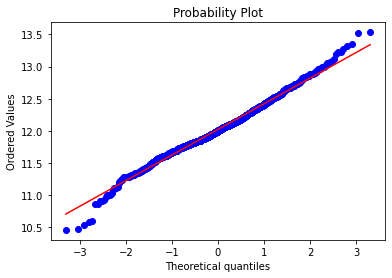

In [13]:
#Post log transformation

#applying log transformation to SalePrice column only
train_log = np.log(train_tr['SalePrice'])
print(train_log.head(5))

#transformed histogram and normal probability plot
sns.distplot(train_log, fit= stats.norm);
fig = plt.figure()
res = stats.probplot(train_log, plot=plt)

## Train - validation data split

+ Train-validation data split
+ Feature selection
+ Data normalization and standardization

In [14]:
X = train_tr.copy()
y = train_log
#y = train_tr.SalePrice
#print(y)

X.drop(['SalePrice'],axis=1, inplace=True)

#train_test_split split data to test and train x is features y is class label(target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 62)
(438, 62)
(1021,)
(438,)


## Feature selection

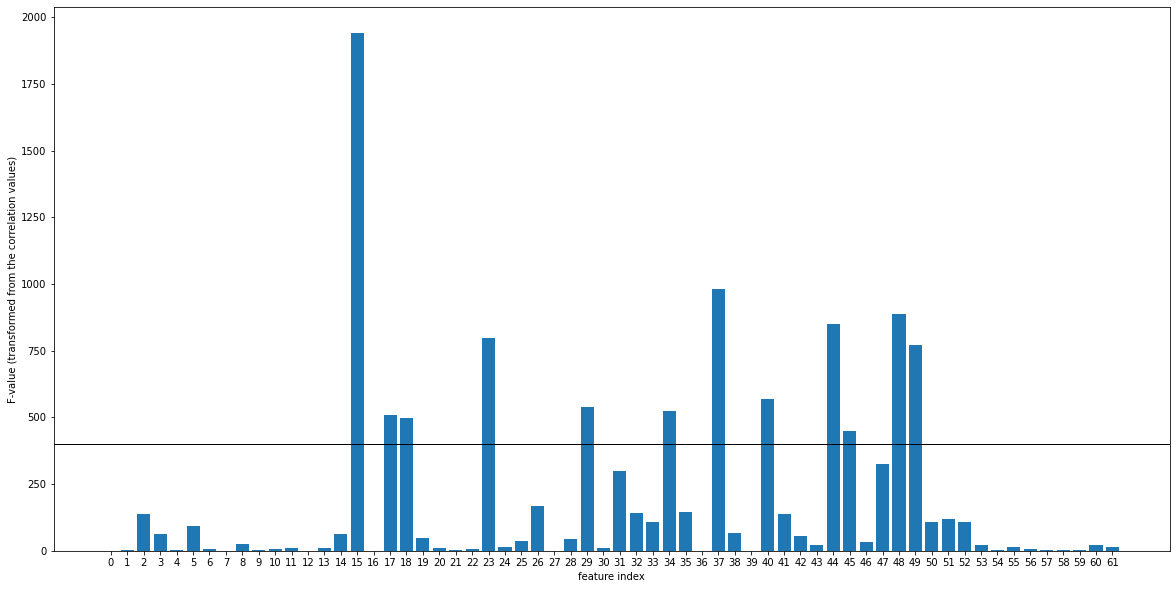

In [15]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

# learn relationship from training data
f_selector.fit(X_train, y_train)

# transform train input data
X_train_fs = f_selector.transform(X_train)

# transform test input data
X_test_fs = f_selector.transform(X_test)

# Plot the scores for the features
f, ax = plt.subplots(figsize=(20,10))
plt.axhline(y=400, linewidth=1, color='k')  #To help us pick which values above threshold line (y = 400**) - Lexie
idx = np.asarray([i for i in range(len(f_selector.scores_))])
ax.set_xticks(idx)  #to know which column number is above the threshold - Lexie

plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [16]:
cols = f_selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
print(cols)
print(features_df_new.columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

In [17]:
#above 400
#15, 23, 29, 34, 37, 40, 44, 45, 48, 49 + added + 17, 18

columns_to_check = [0, 15, 17, 18, 23, 29, 34, 37, 40, 44, 45, 48, 49]
features_to_check = X_train.iloc[:,columns_to_check]
#print(features_df_new)
print(columns_to_check)
print(features_to_check.columns)

[0, 15, 17, 18, 23, 29, 34, 37, 40, 44, 45, 48, 49]
Index(['Id', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')


####  Considering only features with higher feature importance in model training

In [18]:
X_train_features = X_train.loc[:,['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars','GarageArea']]
print(X_train_features.head(2))
print(X_train_features.shape)

X_test_features = X_test.loc[:,['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars','GarageArea']]
print(X_test_features.head(2))
print(X_test_features.shape)

      OverallQual  YearBuilt  YearRemodAdd  ExterQual  TotalBsmtSF  1stFlrSF  \
1453          7.0     2004.0        2005.0        3.0       1221.0    1221.0   
1099          7.0     1978.0        1978.0        2.0       1271.0    1601.0   

      GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
1453     1221.0       2.0          1.0           6.0         2.0       400.0  
1099     1601.0       2.0          2.0           7.0         2.0       478.0  
(1021, 12)
      OverallQual  YearBuilt  YearRemodAdd  ExterQual  TotalBsmtSF  1stFlrSF  \
1419          6.0     1968.0        1968.0        2.0        708.0     708.0   
494           5.0     1938.0        1996.0        2.0        190.0     886.0   

      GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
1419     1416.0       2.0          2.0           7.0         2.0       776.0  
494       886.0       1.0          2.0           4.0         1.0       273.0  
(438, 12)


### Data normalization and standardization - on high feature importance columns

In [19]:
#Data normalization and standardization 

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train_features)
min_max_X_train = min_max_scaler.transform(X_train_features)
min_max_X_test = min_max_scaler.transform(X_test_features)

abt_tr_min_max = pd.DataFrame(min_max_X_train, columns = X_train_features.columns)
abt_tr_min_max.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea
0,0.666667,0.953846,0.916667,0.666667,0.199836,0.203534,0.167106,0.666667,0.333333,0.333333,0.5,0.282087
1,0.666667,0.753846,0.466667,0.333333,0.208020,0.290730,0.238696,0.666667,0.666667,0.416667,0.5,0.337094
2,0.555556,0.753846,0.466667,0.333333,0.109984,0.077559,0.200829,0.333333,0.666667,0.333333,0.5,0.310296
3,0.555556,0.423077,0.600000,0.333333,0.184452,0.206976,0.334213,0.666667,0.333333,0.416667,0.5,0.380818
4,0.555556,0.961538,0.916667,0.666667,0.120786,0.092703,0.215147,0.666667,0.333333,0.416667,0.5,0.380818


In [20]:
#Standardize features by removing the mean and scaling to unit variance
std_scaler = StandardScaler()
std_scaler.fit(min_max_X_train) #Compute the mean and std to be used for later scaling.
X_train_std = std_scaler.transform(min_max_X_train)
X_test_std = std_scaler.transform(min_max_X_test)

abt_tr_std = pd.DataFrame(X_train_std, columns = X_train_features.columns)
abt_tr_std.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea
0,0.661837,1.092875,0.992176,1.061577,0.351911,0.139971,-0.566544,0.778411,-0.737999,-0.347472,0.296124,-0.364548
1,0.661837,0.219798,-0.331510,-0.692258,0.464935,1.119795,0.131092,0.778411,0.762991,0.257936,0.296124,0.008401
2,-0.062424,0.219798,-0.331510,-0.692258,-0.889092,-1.275617,-0.237921,-1.036104,0.762991,-0.347472,0.296124,-0.173292
3,-0.062424,-1.224136,0.060694,-0.692258,0.139426,0.178648,1.061886,0.778411,-0.737999,0.257936,0.296124,0.304848
4,-0.062424,1.126455,0.992176,1.061577,-0.739901,-1.105437,-0.098393,0.778411,-0.737999,0.257936,0.296124,0.304848


In [21]:
# adding Id column

X_train_df = pd.DataFrame(X_train_std, columns = X_train_features.columns)
#X_train_df['Id'] = X_train['Id'].values.astype(int)
print(X_train_df.head(2))

X_test_df = pd.DataFrame(X_test_std, columns = X_train_features.columns)
#X_test_df['Id'] = X_test['Id'].values.astype(int)
print(X_test_df.head(2))
print(X_test_df.shape)

   OverallQual  YearBuilt  YearRemodAdd  ExterQual  TotalBsmtSF  1stFlrSF  \
0     0.661837   1.092875      0.992176   1.061577     0.351911  0.139971   
1     0.661837   0.219798     -0.331510  -0.692258     0.464935  1.119795   

   GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
0  -0.566544  0.778411    -0.737999     -0.347472    0.296124   -0.364548  
1   0.131092  0.778411     0.762991      0.257936    0.296124    0.008401  
   OverallQual  YearBuilt  YearRemodAdd  ExterQual  TotalBsmtSF  1stFlrSF  \
0    -0.062424  -0.116000     -0.821763  -0.692258    -0.807715 -1.182792   
1    -0.786685  -1.123396      0.550947  -0.692258    -1.978643 -0.723822   

   GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
0  -0.208547  0.778411     0.762991      0.257936    0.296124    1.433258  
1  -1.181566 -1.036104     0.762991     -1.558289   -1.078161   -0.971785  
(438, 12)


## Model building

### With applying data normalization and standardization - on high feature importance columns

In [22]:
X_train_df.head(2)
#high correlation 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea
0,0.661837,1.092875,0.992176,1.061577,0.351911,0.139971,-0.566544,0.778411,-0.737999,-0.347472,0.296124,-0.364548
1,0.661837,0.219798,-0.331510,-0.692258,0.464935,1.119795,0.131092,0.778411,0.762991,0.257936,0.296124,0.008401


In [23]:
# some columns - high feature importance columns
lr = LinearRegression().fit(X_train_df, y_train)

y_pred_V = lr.predict(X_test_df)

In [24]:
y_pred = pd.DataFrame(y_pred_V)

# adding column name to the respective columns 
y_pred.columns =['SalePrice']

# adding Id column
y_pred['Id'] = X_test['Id'].values.astype(int) # use X_test['Id']

#de-log the Saleprice values
y_pred['SalePrice'] = np.exp(y_pred['SalePrice'])

In [25]:
print(y_pred.head(5))

y_pred.to_csv("linear_reg_features_validationData.csv",index=False)

       SalePrice    Id
0  149549.963467  1421
1  106516.447614   495
2  103744.831514  1413
3  129327.575107   570
4  131495.906030   487


In [26]:
y_test_df = pd.DataFrame(y_test)
print(y_test_df.head(5))

      SalePrice
1419  12.100156
494   11.421906
1411  11.407565
569   11.820116
486   11.957611


In [27]:
# adding Id column
y_test_df['Id'] = X_test['Id'].values.astype(int)

#de-log the Saleprice values
y_test_df['SalePrice'] = np.exp(y_test_df['SalePrice'])

print(y_test_df.head(5))
y_test_df.to_csv("test_actual_price_features_validationData.csv",index=False)

      SalePrice    Id
1419   179900.0  1421
494     91300.0   495
1411    90000.0  1413
569    135960.0   570
486    156000.0   487


In [28]:
#find MAPE on validation datasets
# linear_reg_features_validationData ------------ output of LinearRegression model prediction
# test_actual_price_features_validationData ----- atcual Saleprice

p = pd.read_csv('linear_reg_features_validationData.csv',header=0)
p.columns =['SalePrice','Id']
#print(p.head(5))

o = pd.read_csv('test_actual_price_features_validationData.csv',header=0)
o.columns =['SalePrice','Id']
#print(o.head(5))

eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
print(eva.shape)
print(eva.head(5))

(438, 3)
   SalePrice_pred    Id  SalePrice_actual
0   149549.963467  1421          179900.0
1   106516.447614   495           91300.0
2   103744.831514  1413           90000.0
3   129327.575107   570          135960.0
4   131495.906030   487          156000.0


In [29]:
# some columns - high feature importance

mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.1144556326412756


# WORKING ON TEST DATA

## Data Pre-Processing

+ Identifying missing data
+ Categorical data encoding
+ Missing data imputation

In [ ]:
### On test data

In [30]:
#missing data
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)


,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


#### Subset test data for these high feature importance columns

In [31]:
#'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars','GarageArea'
test = test_data.loc[:,['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageCars','GarageArea']]
print(test.head(2))
print(test.shape)

   OverallQual  YearBuilt  YearRemodAdd ExterQual  TotalBsmtSF  1stFlrSF  \
0            5       1961          1961        TA        882.0       896   
1            6       1958          1958        TA       1329.0      1329   

   GrLivArea  FullBath KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
0        896         1          TA             5         1.0       730.0  
1       1329         1          Gd             6         1.0       312.0  
(1459, 12)


In [32]:
#pd.DataFrame(test['KitchenQual'].value_counts(normalize=True))
test['KitchenQual'].fillna(value='TA', inplace=True)

In [33]:
#apply categorical encoding on only these columns

### Categorical data encoding

test['ExterQual'] = test['ExterQual'].map (lambda x: 0 if ('Po' in x) else 1 if ('Fa' in x)
                                             else 2 if ('TA' in x) else 3 if ('Gd' in x) else 4 if ('Ex' in x) else 5 )

test['KitchenQual'] = test['KitchenQual'].map (lambda x: 0 if ('Ex' in x)
                                                     else 1 if ('Gd' in x)    else 2 if ('TA' in x)    else 3 if ('Fa' in x)    else 4 if ('Po' in x)    else 5)
                                           

In [34]:
#GarageArea, GarageCars, TotalBsmtSF
# impute data for the NAN values in these columns 

#pd.DataFrame(test['GarageArea'].value_counts(normalize=True))
test['GarageArea'].fillna(value=0, inplace=True)

In [35]:
#pd.DataFrame(test['GarageCars'].value_counts(normalize=True))
test['GarageCars'].fillna(value=2, inplace=True)

In [36]:
#pd.DataFrame(test['TotalBsmtSF'].value_counts(normalize=True))
test['TotalBsmtSF'].fillna(value=0, inplace=True)

In [37]:
print(test.head(2))
print(test['KitchenQual'].unique())

   OverallQual  YearBuilt  YearRemodAdd  ExterQual  TotalBsmtSF  1stFlrSF  \
0            5       1961          1961          2        882.0       896   
1            6       1958          1958          2       1329.0      1329   

   GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
0        896         1            2             5         1.0       730.0  
1       1329         1            1             6         1.0       312.0  
[2 1 0 3]


In [38]:
### Data normalization and standardization - on high feature importance columns

#Data normalization and standardization 

# Instantiate MinMaxScaler and use it to rescale test data
min_max_test = min_max_scaler.transform(test)

abt_tr_min_max = pd.DataFrame(min_max_test, columns = test.columns)
abt_tr_min_max.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea
0,0.444444,0.623077,0.183333,0.333333,0.144354,0.128958,0.105878,0.333333,0.666667,0.250000,0.25,0.514810
1,0.555556,0.600000,0.133333,0.333333,0.217512,0.228316,0.187453,0.333333,0.333333,0.333333,0.25,0.220028
2,0.444444,0.900000,0.800000,0.333333,0.151882,0.136301,0.243971,0.666667,0.666667,0.333333,0.50,0.339915
3,0.555556,0.907692,0.800000,0.333333,0.151555,0.135842,0.239261,0.666667,0.333333,0.416667,0.50,0.331453
4,0.777778,0.861538,0.700000,0.666667,0.209493,0.217072,0.178222,0.666667,0.333333,0.250000,0.50,0.356841


In [39]:
#Standardize features by removing the mean and scaling to unit variance
test_std = std_scaler.transform(min_max_test)

abt_tr_std = pd.DataFrame(test_std, columns = test.columns)
abt_tr_std.head()

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea
0,-0.786685,-0.351059,-1.164941,-0.692258,-0.414392,-0.698037,-1.163207,-1.036104,0.762991,-0.952880,-1.078161,1.213314
1,-0.062424,-0.451799,-1.312017,-0.692258,0.596043,0.418447,-0.368269,-1.036104,-0.737999,-0.347472,-1.078161,-0.785311
2,-0.786685,0.857816,0.648998,-0.692258,-0.310410,-0.615525,0.182497,0.778411,0.762991,-0.347472,0.296124,0.027527
3,-0.062424,0.891396,0.648998,-0.692258,-0.314931,-0.620682,0.136600,0.778411,-0.737999,0.257936,0.296124,-0.029850
4,1.386098,0.689917,0.354846,1.061577,0.485279,0.292101,-0.458227,0.778411,-0.737999,-0.952880,0.296124,0.142281


In [40]:
test_df = pd.DataFrame(test_std, columns = test.columns)
print(test_df.head(2))

   OverallQual  YearBuilt  YearRemodAdd  ExterQual  TotalBsmtSF  1stFlrSF  \
0    -0.786685  -0.351059     -1.164941  -0.692258    -0.414392 -0.698037   
1    -0.062424  -0.451799     -1.312017  -0.692258     0.596043  0.418447   

   GrLivArea  FullBath  KitchenQual  TotRmsAbvGrd  GarageCars  GarageArea  
0  -1.163207 -1.036104     0.762991     -0.952880   -1.078161    1.213314  
1  -0.368269 -1.036104    -0.737999     -0.347472   -1.078161   -0.785311  


In [41]:
test_df

#missing data
total = test_df.isnull().sum().sort_values(ascending=False)
percent = (test_df.isnull().sum()/test_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#GarageArea, GarageCars, TotalBsmtSF

,Total,Percent
GarageArea,0,0.0
GarageCars,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
FullBath,0,0.0
GrLivArea,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0
ExterQual,0,0.0
YearRemodAdd,0,0.0


#### Model prediction on the test dataset

In [42]:
# some columns - high feature importance columns
y_pred_V = lr.predict(test_df)

In [43]:
y_pred = pd.DataFrame(y_pred_V)

# adding column name to the respective columns 
y_pred.columns =['SalePrice']

# adding Id column
y_pred['Id'] = test_data['Id'].values.astype(int) # use test_data['Id']

#de-log the Saleprice values
y_pred['SalePrice'] = np.exp(y_pred['SalePrice'])

In [44]:
print(y_pred.head(5))

y_pred.to_csv("linear_reg_features_testdata.csv",index=False)

       SalePrice    Id
0  113132.730260  1461
1  148003.171666  1462
2  156945.861875  1463
3  183433.913784  1464
4  207654.645447  1465


In [ ]:
#### Now compare the "Saleprice" values between these 2 datasets
#'test_actual_price.csv' ----- actual Saleprice provided by professor
#linear_reg_features_testdata.csv ----- predictions we make on the test data

In [45]:
import pandas as pd

p = pd.read_csv('linear_reg_features_testdata.csv',header=0)
p.columns =['SalePrice','Id']
#print(p.head(5))

#o = pd.read_csv('test_actual_price.csv',header=0)
#o.columns =['Id', 'SalePrice']
#print(o.head(5))
o = pd.read_csv(r'C:\Users\Anitha Karunakaran\Documents\GSU_MSDA\Fall1 semester\Data Programming MSA 8010\Final project\test_actual_price.csv', low_memory=False, delimiter =",")

eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
print(eva.shape)
print(eva.head(5))

(1459, 3)
   SalePrice_pred    Id  SalePrice_actual
0   113132.730260  1461            105000
1   148003.171666  1462            172000
2   156945.861875  1463            189900
3   183433.913784  1464            195500
4   207654.645447  1465            191500


In [46]:
# some columns - high feature importance

mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.1215264105975238


In [ ]:
#linear regression model
0.1144556326412756 validation
0.1215264105975238 test

# XGBOOST

In [ ]:
#! pip install xgboost

In [47]:
import xgboost

In [49]:
# without hyperparameter tuning
#xgb_clf = xgboost.XGBRegressor()

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

##initial hyperparameter tuning
#learning_rate =0.1,max_depth = 5,min_child_weight = 1,gamma = 0,subsample=0.8,colsample_bytree = 0.8,scale_pos_weight = 1
xgb_clf = xgboost.XGBRegressor(learning_rate =0.1,max_depth = 5,min_child_weight = 1,gamma = 0,subsample=0.8,colsample_bytree = 0.8,scale_pos_weight = 1)

#hyperparameters based on GridSearch
#learning_rate = 0.1, max_depth =  2, min_child_weight = 3, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8, reg_alpha = 0.9, scale_pos_weight = 1
#xgb_clf = xgboost.XGBRegressor(learning_rate = 0.1, max_depth =  2, min_child_weight = 3, gamma = 0.1, subsample = 0.8, colsample_bytree = 0.8, reg_alpha = 0.9, scale_pos_weight = 1)

xgb_clf.fit(X_train_df,y_train)

y_pred_V = xgb_clf.predict(X_test_df)

In [50]:
print(xgb_clf.get_xgb_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [51]:
y_pred = pd.DataFrame(y_pred_V)
# adding column name to the respective columns 
y_pred.columns =['SalePrice']

print(y_pred.head(2))

   SalePrice
0  11.947843
1  11.555283


In [52]:
# adding Id column
y_pred['Id'] = X_test['Id'].values.astype(int) # use X_test['Id']

#de-log the Saleprice values
y_pred['SalePrice'] = np.exp(y_pred['SalePrice'])

print(y_pred.head(5))

y_pred.to_csv("xgboost_features_validationData.csv",index=False)

       SalePrice    Id
0  154483.500000  1421
1  104326.695312   495
2   96158.484375  1413
3  133868.484375   570
4  136931.250000   487


In [53]:
#find MAPE on validation datasets
# xgboost_features_validationData ------------ output of XGBoost model prediction
# test_actual_price_features_validationData ----- atcual Saleprice

import pandas as pd

#p = pd.read_csv('linear_reg.csv')
#o = pd.read_csv('test_actual_price.csv')

p = pd.read_csv('xgboost_features_validationData.csv',header=0)
p.columns =['SalePrice','Id']
#print(p.head(5))

o = pd.read_csv('test_actual_price_features_validationData.csv',header=0)
o.columns =['SalePrice','Id']
#print(o.head(5))

eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
print(eva.shape)
print(eva.head(5))


(438, 3)
   SalePrice_pred    Id  SalePrice_actual
0      154483.500  1421          179900.0
1      104326.695   495           91300.0
2       96158.484  1413           90000.0
3      133868.480   570          135960.0
4      136931.250   487          156000.0


In [54]:
# some columns - high feature importance

mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.11163477955197276


In [55]:
# some columns - high feature importance columns
y_pred_V = xgb_clf.predict(test_df)

In [56]:
y_pred = pd.DataFrame(y_pred_V)

# adding column name to the respective columns 
y_pred.columns =['SalePrice']

# adding Id column
y_pred['Id'] = test_data['Id'].values.astype(int) # use test_data['Id']

#de-log the Saleprice values
y_pred['SalePrice'] = np.exp(y_pred['SalePrice'])


In [57]:
print(y_pred.head(5))

y_pred.to_csv("xgboost_features_testdata.csv",index=False)

       SalePrice    Id
0  121201.617188  1461
1  143179.421875  1462
2  166426.703125  1463
3  186394.750000  1464
4  202805.781250  1465


In [ ]:
#### Now compare the "Saleprice" values between these 2 datasets
#'test_actual_price.csv' ----- actual Saleprice provided by professor
#xgboost_features_testdata.csv ----- predictions we make on the test data

In [58]:
import pandas as pd

p = pd.read_csv('xgboost_features_testdata.csv',header=0)
p.columns =['SalePrice','Id']
#print(p.head(5))

#o = pd.read_csv('test_actual_price_log.csv',header=0)
#o.columns =['SalePrice','Id']
#print(o.head(5))
o = pd.read_csv(r'C:\Users\Anitha Karunakaran\Documents\GSU_MSDA\Fall1 semester\Data Programming MSA 8010\Final project\test_actual_price.csv', low_memory=False, delimiter =",")


eva = pd.merge(p, o, on='Id', how='inner', suffixes=['_pred', '_actual'])
print(eva.shape)
print(eva.head(5))

(1459, 3)
   SalePrice_pred    Id  SalePrice_actual
0       121201.62  1461            105000
1       143179.42  1462            172000
2       166426.70  1463            189900
3       186394.75  1464            195500
4       202805.78  1465            191500


In [59]:
# some columns - high feature importance

mape = np.mean(np.abs(eva['SalePrice_actual'] - eva['SalePrice_pred']) / eva['SalePrice_actual'])
print(mape)

0.11006863352419954


In [ ]:
#XGBoost model - without hyperparameter tuning
0.12111316109492158 validation
0.11780735261210223 test

In [ ]:
#XGBoost model - with hyperparameter tuning
0.11163477955197276 validation
0.11006863352419954 test

In [ ]:
#XGBoost model - with hyperparameter tuning using GridSearch
0.11254426523289165 validation
0.11358889140796771 test

#### use gridSearch to find best parameters

In [ ]:
#use gridSearch to find best parameters
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for parameters
learning_rate = 0.1 #[0.15, 0.1, 0.01]
#max_depth =  2 #[1,2,3,4]#range(3,10,2)
#min_child_weight = 3 #[2,3,4]#range(1,6,2)
#gamma = 0.1 #[i/10.0 for i in range(0,5)]
#subsample = 0.8 #[i/10.0 for i in range(6,10)]
#colsample_bytree = 0.8 [i/10.0 for i in range(6,10)]
#reg_alpha = 0.9 #[0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3] #[1e-5, 1e-2, 0.1, 1, 100]
#scale_pos_weight = 1

# Create a dictionary parameters are keys and the lists of their values are corresponding values
param_grid = dict(learning_rate = learning_rate
#                max_depth = max_depth, 
#                  min_child_weight = min_child_weight,
#                  reg_alpha = reg_alpha,
#                  gamma = gamma
#                  subsample = subsample,
#                  colsample_bytree = colsample_bytree,
#                  reg_alpha = reg_alpha
                 )


# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(X_train_df,y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

In [1]:
Best: 0.832705 using {'max_depth': 2, 'min_child_weight': 3}
Best: 0.817991 using {'gamma': 0.1}
Best: 0.810901 using {'colsample_bytree': 0.7, 'subsample': 0.8}
Best: 0.824665 using {'reg_alpha': 0.9}
Best: 0.820415 using {'learning_rate': 0.1}

SyntaxError: invalid syntax (<ipython-input-1-e092163f575f>, line 1)